In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from datetime import datetime
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
series = pd.read_csv('zillow-carlifornia .csv', parse_dates=True,squeeze=True)
# series.head()

In [3]:
series.rename(columns={"MedianSoldPrice_AllHomes.California": "median_price"}, inplace=True)

In [4]:
series['Date'] = pd.to_datetime(series['Date']) 

In [5]:
series.head()

,Date,median_price,MedianMortageRate,UnemploymentRate,MedianRentalPrice_AllHomes.California
0,2004-01-31,326752.55,5.02,7.9,NaN
1,2004-02-29,329501.50,4.94,7.8,NaN
2,2004-03-31,340125.45,4.74,7.8,NaN
3,2004-04-30,355329.50,5.16,7.5,NaN
4,2004-05-31,367818.15,5.64,7.3,NaN


In [6]:
data  = series.loc[series['Date']<'2016-01-01']
validation = series.loc[series['Date']>'2016-01-01']

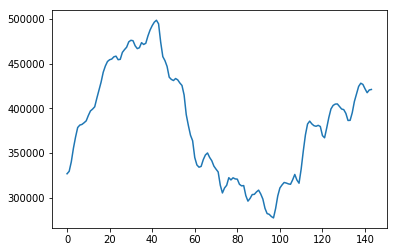

In [7]:
Median_sold=data.median_price
plt.plot(Median_sold)
plt.show()

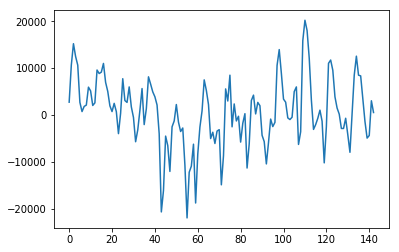

In [8]:
d1 = list()
for i in range(1, len(Median_sold)):
 value = Median_sold[i] - Median_sold[i - 1]
 d1.append(value)

plt.plot(d1) 
plt.show()

In [9]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
adf_test(d1)

Results of Dickey-Fuller Test:
Test Statistic                  -1.687305
p-value                          0.437665
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


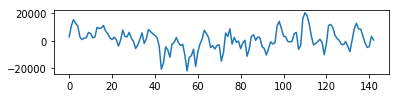

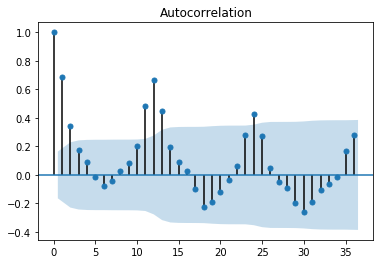

/Users/shreejaya/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


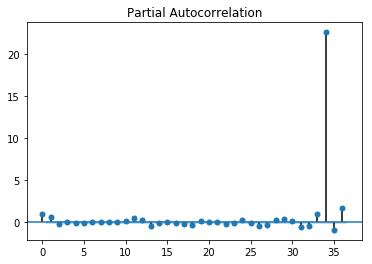

In [10]:
plt.subplot(3,1,1)
plt.plot(d1) 
plt.show()
plot_acf(d1,lags=36) 
plt.show()
plot_pacf(d1,lags=36) 
plt.show()

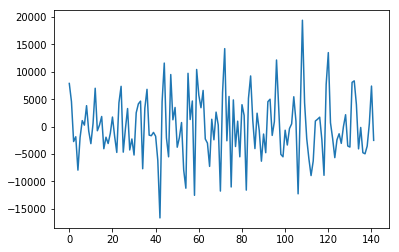

Results of Dickey-Fuller Test:
Test Statistic                  -4.918846
p-value                          0.000032
#Lags Used                      11.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [11]:
d2 = list()
for i in range(1, len(d1)):
 value = d1[i] - d1[i - 1]
 d2.append(value)


plt.plot(d2) 
plt.show()

adf_test(d2)

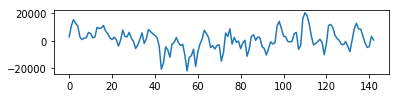

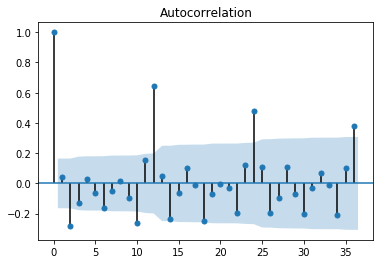

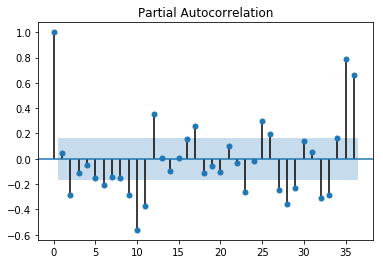

In [12]:
plt.subplot(3,1,1)
plt.plot(d1) 
plt.show()
plot_acf(d2,lags=36) 
plt.show()
plot_pacf(d2,lags=36) 
plt.show()

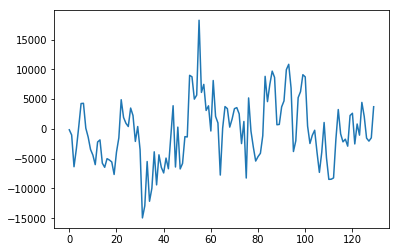

Results of Dickey-Fuller Test:
Test Statistic                  -5.311624
p-value                          0.000005
#Lags Used                       0.000000
Number of Observations Used    129.000000
Critical Value (1%)             -3.482088
Critical Value (5%)             -2.884219
Critical Value (10%)            -2.578864
dtype: float64


In [13]:
d3 = list()
for i in range(12, len(d2)):
 value = d1[i] - d1[i - 12]
 d3.append(value)


plt.plot(d3) 
plt.show()

adf_test(d3)

In [14]:
train_size = int(len(Median_sold) * 0.75)
train, test = Median_sold[:train_size], Median_sold[train_size:]
train.head()

0    326752.55
1    329501.50
2    340125.45
3    355329.50
4    367818.15
Name: median_price, dtype: float64

In [15]:
model = pm.auto_arima(train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=2, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(model.summary())

Fit ARIMA: order=(1, 2, 1) seasonal_order=(0, 1, 1, 12); AIC=1871.765, BIC=1884.482, Fit time=0.426 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 1, 0, 12); AIC=1867.270, BIC=1872.356, Fit time=0.012 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 1, 0, 12); AIC=1871.057, BIC=1881.231, Fit time=0.126 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 1, 1, 12); AIC=1871.296, BIC=1881.469, Fit time=0.190 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 1, 0, 12); AIC=1869.071, BIC=1876.701, Fit time=0.067 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 1, 1, 12); AIC=1869.070, BIC=1876.700, Fit time=0.109 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 1, 1, 12); AIC=1871.118, BIC=1881.291, Fit time=0.100 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 1, 0, 12); AIC=1869.284, BIC=1876.914, Fit time=0.061 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 1, 0, 12); AIC=1869.529, BIC=1877.159, Fit time=0.041 seconds
Fit ARIMA: order=(1, 2, 1) s

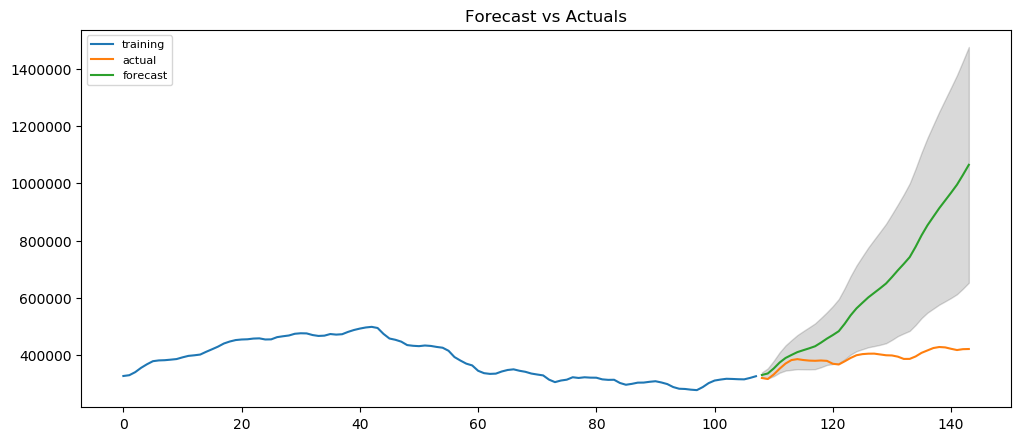

In [16]:
fitted = model.fit(train)
fc, conf = fitted.predict(len(test),return_conf_int=True,alpha=0.05)
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

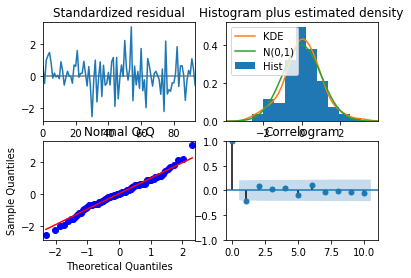

In [17]:
model.plot_diagnostics()
plt.show()

In [18]:
mse = ((fc_series - test) ** 2).mean()
rmse=round(np.sqrt(mse), 2)
print(rmse)

306116.3


# SARIMAX (Med. Sold Price vs. Med. Mortgage Rate)

In [19]:
#SARIMAX
MedianMortageRate=data.MedianMortageRate
exog_train=MedianMortageRate[:train_size, None]
exog_test=MedianMortageRate[train_size:,None]


In [20]:
modelx = SARIMAX(train, order=(1,2,1),exog=exog_train)
fitx=modelx.fit()
print(fitx.summary())

                           Statespace Model Results                           
Dep. Variable:           median_price   No. Observations:                  108
Model:               SARIMAX(1, 2, 1)   Log Likelihood               -1059.578
Date:                Sat, 07 Dec 2019   AIC                           2127.157
Time:                        12:14:34   BIC                           2137.810
Sample:                             0   HQIC                          2131.475
                                - 108                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          4227.7464   2464.723      1.715      0.086    -603.023    9058.516
ar.L1          0.8204      0.092      8.938      0.000       0.641       1.000
ma.L1         -0.9279      0.076    -12.273      0.0

In [21]:
fc = fitx.predict(start=108, end=143, exog=exog_test)

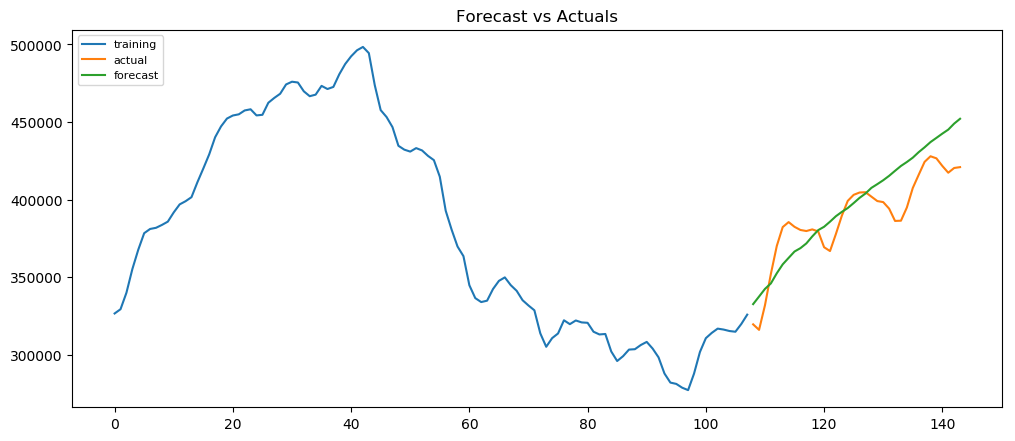

In [22]:
fc_series = pd.Series(fc)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [23]:
mse = ((fc_series - test) ** 2).mean()
rmse=np.sqrt(mse)
print(rmse)


17690.74017044241


# SARIMAX (Med. Sold Price vs. Unemployment Rate)

In [24]:
UnemploymentRate=data.UnemploymentRate
exog_train=UnemploymentRate[:train_size, None]
exog_test=UnemploymentRate[train_size:,None]

In [25]:
modelx = SARIMAX(train, order=(1,2,1),exog=exog_train)
fitx=modelx.fit()
print(fitx.summary())

                           Statespace Model Results                           
Dep. Variable:           median_price   No. Observations:                  108
Model:               SARIMAX(1, 2, 1)   Log Likelihood               -1061.204
Date:                Sat, 07 Dec 2019   AIC                           2130.409
Time:                        12:14:34   BIC                           2141.063
Sample:                             0   HQIC                          2134.727
                                - 108                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -434.2420    637.973     -0.681      0.496   -1684.646     816.162
ar.L1          0.8277      0.092      8.951      0.000       0.646       1.009
ma.L1         -0.9284      0.078    -11.949      0.0

In [26]:
fc = fitx.predict(start=108, end=143, exog=exog_test)

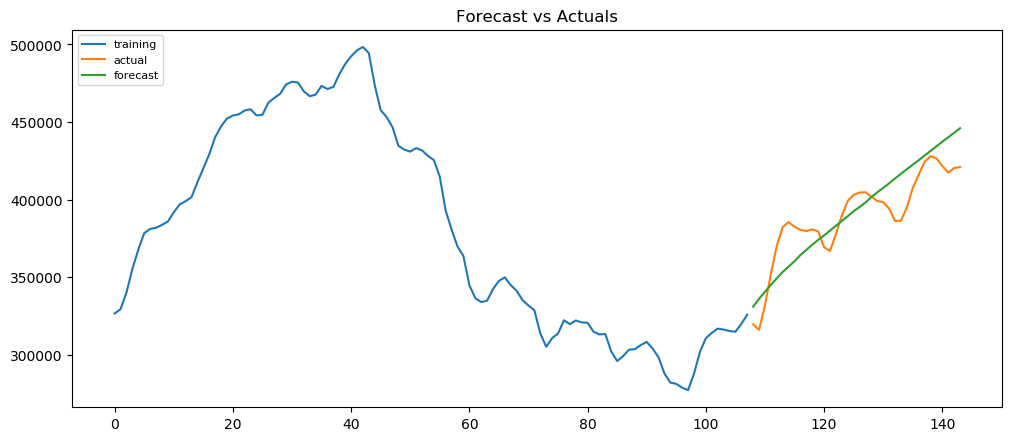

In [27]:
fc_series = pd.Series(fc)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [28]:
mse = ((fc_series - test) ** 2).mean()
rmse=np.sqrt(mse)
print(rmse)


16105.74125858913


# Forecasting

In [29]:
# choose the best model
# retrain using whole data?
